In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import numpy as np
from numpy import median

In [2]:
Budget_clean = pd.read_csv('Budget_clean.csv', index_col = [0])

In [3]:
OpusGenre_clean = pd.read_csv('OpusGenre_clean.csv', index_col = [0])

In [4]:
Budget_clean.head(1)

,Release Date,Movie,Budget,Domestic Gross,Worldwide Gross,Year,Week,Dom_Profits,WW_Profits
0,2009-12-18,Avatar,425000000,760507625,2789705275,2009,51,335507625,2364705275


In [5]:
OpusGenre_clean.head(1)

,movie_name,genre
0,Madea's Family Reunion,Comedy


In [6]:
#merge the Budget and OpusGenre dataframes over the movie titles found in BOTH dataframes
Budget_Genre = pd.merge(Budget_clean, OpusGenre_clean, left_on='Movie', right_on = 'movie_name', how='inner')

In [7]:
#Check how many data points this leaves me with 1388
Budget_Genre.shape

(1388, 11)

In [8]:
Budget_Genre.head(1)

,Release Date,Movie,Budget,Domestic Gross,Worldwide Gross,Year,Week,Dom_Profits,WW_Profits,movie_name,genre
0,2009-12-18,Avatar,425000000,760507625,2789705275,2009,51,335507625,2364705275,Avatar,Action


In [9]:
#add % ROI column 
Budget_Genre['%ROI'] = (Budget_Genre['Dom_Profits'] / Budget_Genre['Budget'])*100

In [10]:
# Add a KEY to use with CE IMDB data Late on in his analysis
Budget_Genre['KEY'] = Budget_Genre["Movie"] +' - ' +Budget_Genre["Year"].map(str)

In [11]:
Budget_Genre.head(1)

,Release Date,Movie,Budget,Domestic Gross,Worldwide Gross,Year,Week,Dom_Profits,WW_Profits,movie_name,genre,%ROI,KEY
0,2009-12-18,Avatar,425000000,760507625,2789705275,2009,51,335507625,2364705275,Avatar,Action,78.942971,Avatar - 2009


In [12]:
#Make a sub df of Genre and ROI
bud_gen_only = Budget_Genre[['genre', '%ROI']]
#Grouped by Genre and Calculated the ROI
bud_gen_only_med = bud_gen_only.groupby('genre').median()
#Sorted the df by Median ROIs
bud_gen_only_med.sort_values('%ROI', inplace = True)
#saved the sorted genres as a list to feed into plot order
gen_by_roi = bud_gen_only_med.index.tolist()


In [13]:
#Check my list 
gen_by_roi

['Documentary',
 'Drama',
 'Action',
 'Thriller/Suspense',
 'Western',
 'Adventure',
 'Horror',
 'Black Comedy',
 'Romantic Comedy',
 'Comedy',
 'Musical']

In [14]:
gen_by_roi.reverse()

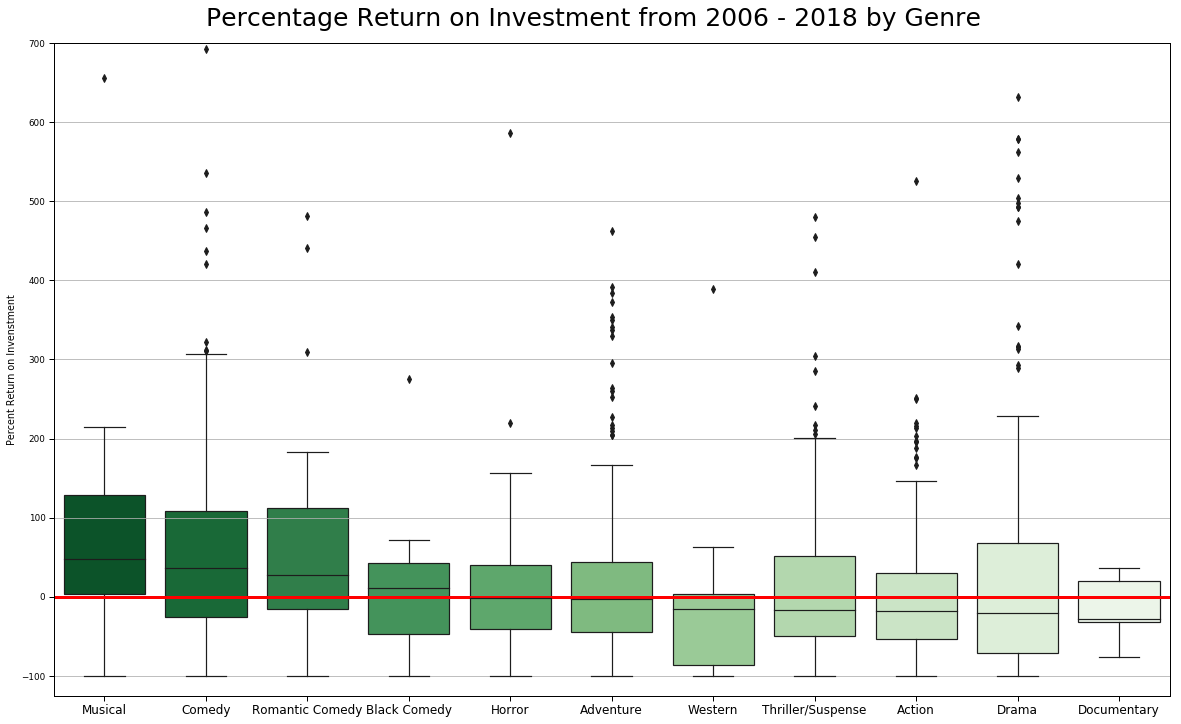

In [15]:
#plot %ROI by Genre ordered by Median %ROI


#set figure size
plt.figure(figsize=(20,12))
#set context and xtick size so that they werent overlapping in the image
sns.set_context("paper", rc={'xtick.labelsize': 12.0})
#set the window
plt.ylim(-125, 700)
#make sure grid axis were visable
plt.grid(b=True, which='major', axis='both')
#Make the plot using seaborn
ax = sns.boxplot(x="genre", y="%ROI", data=Budget_Genre, palette="Greens_r", showfliers=True, order = gen_by_roi).set(xlabel='', ylabel='Percent Return on Invenstment')
#make a horizontal line in red for the breakeven point ROI% = 0
plt.axhline(y=0, color = "Red", label = "Break Even", lw = 3)
#add title to plot
plt.figtext(.5,.9,'Percentage Return on Investment from 2006 - 2018 by Genre', fontsize=25, ha='center')
#save the plot
plt.savefig('ROI_by_Genre.jpg')
#show the plot
plt.show()

In [16]:
#pull dataframw containing jsut the comedies
Comedies = Budget_Genre[Budget_Genre.genre.isin(['Comedy','Romantic Comedy', 'Black Comedy'])]

In [17]:
#cheack how many datapoints i will be working with
Comedies.shape

(278, 13)

In [18]:
#set the median of the %roi
med = Comedies['Budget'].median()

In [19]:
#set the standard deviation of the %roi
sig = Comedies['Budget'].std()

In [20]:
#make a list of my possible outcomes of the following function  will late be used in creating a color palette
outcomes = ['Below {} million'.format(int((med - sig * .5)/1000000)), 
            'Between {} to {} million'.format(int((med - sig * .5)/1000000), int((med + sig * .5)/1000000)), 
            'Above {} million'.format(int((med + sig * .5)/1000000))]

In [21]:
#functiont that groups movies into 3 categories in comparison to the med and an interval of std/2 
def BOA_med(amount):
    if amount <= med - sig * .5:
        return 'Below {} million'.format(int((med - sig * .5)/1000000))
    elif amount <=  med + sig * .5:
        return 'Between {} to {} million'.format(int((med - sig * .5)/1000000), int((med + sig * .5)/1000000))
    elif amount > med + sig * .5:
        return 'Above {} million'.format(int((med + sig * .5)/1000000))

In [22]:
#creates a new column in comedies to house the outcome of the function
Comedies['Interval'] = Comedies['Budget'].apply(lambda x: BOA_med(x))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


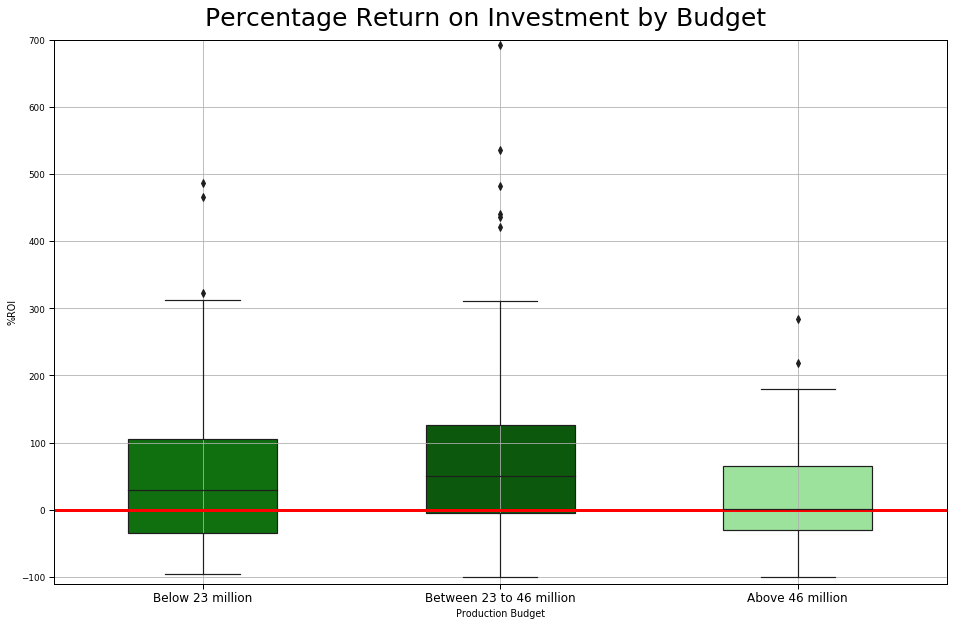

In [23]:
#Plot figure

#set plot size
fig= plt.figure(figsize=(16,10))
#create dictionary color palette to use in ploy based on outcome from function
my_pal = {outcomes[0]: "green",
         outcomes[1]: "darkgreen",
         outcomes[2]: "lightgreen"}
#make th plot
bplot = sns.boxplot(y='%ROI', x='Interval', 
                 data=Comedies, 
                 width=0.5,
                 palette = my_pal, 
                 order = ['Below {} million'.format(int((med - sig * .5)/1000000)), 'Between {} to {} million'.format(int((med - sig * .5)/1000000), int((med + sig * .5)/1000000)), 'Above {} million'.format(int((med + sig * .5)/1000000))]).set(xlabel = "Production Budget")
#change x-tick label size to be readable
sns.set_context("paper", rc={'xtick.labelsize': 14.0})
#set window frame
plt.ylim(-110, 700)
plt.rcParams["axes.labelsize"] = 18
#set title
plt.figtext(.5,.9,'Percentage Return on Investment by Budget', fontsize=25, ha='center')
#make grid visable
plt.grid(b=True, which='major', axis='both')
#created red breakeven line aat %ROI = 0 
plt.axhline(y=0, color = "red", label = "", lw = 3)
#save the figure
plt.savefig('ROI_by_Compared_Med.jpeg');

In [24]:
#create new column using Weeks to set dates to the weeks to better see what time to year to release
week_dates = []
d = "2017-W1"
r = datetime.datetime.strptime(d + '-1', "%Y-W%W-%w")
for w in range(0,52):
    week_index = (r+datetime.timedelta(weeks=w) + datetime.timedelta(days=2))
    week_dates.append(week_index.strftime("%d-%b"))
week_dates.append("31-Dec")
week_dates


Comedies['Week Date'] = Comedies['Week'].apply(lambda x: week_dates[x-1])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


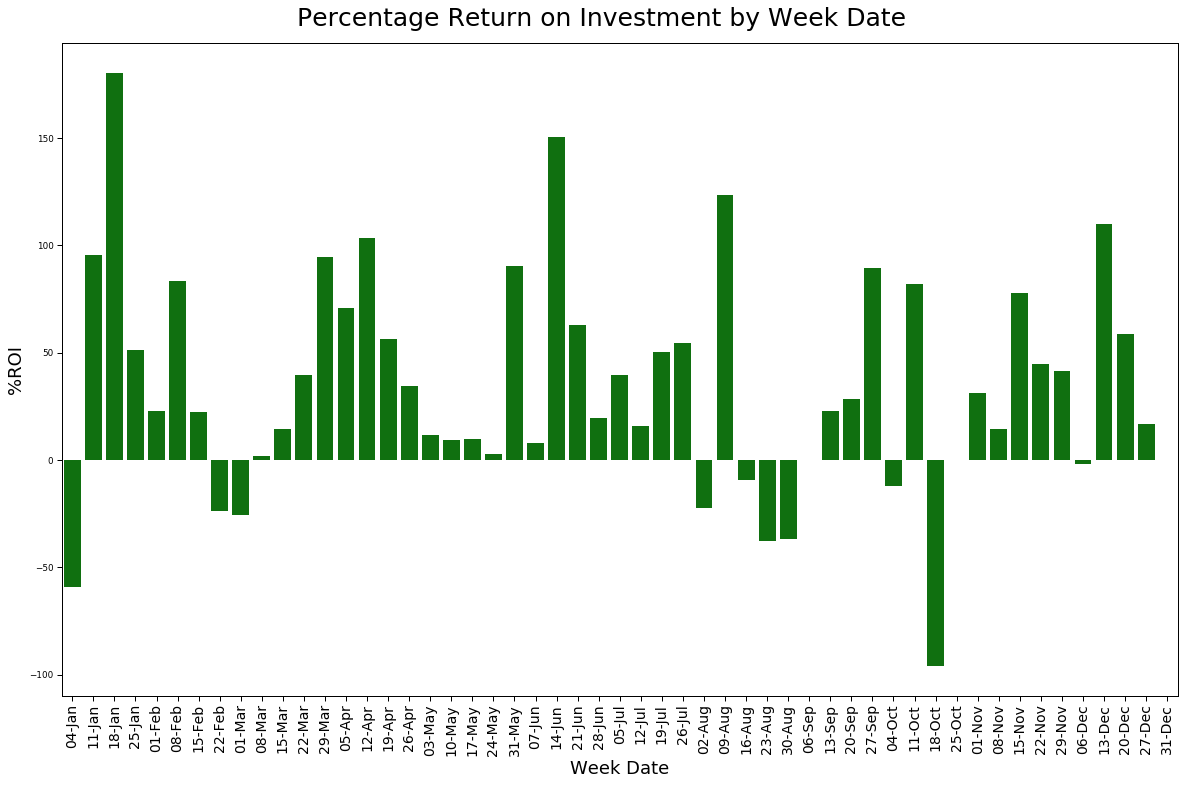

In [27]:
plt.figure(figsize=(20,12))
GroupedValues = Comedies.groupby('Week Date')['%ROI'].median().reset_index()
plt.xticks(rotation=90);
plt.figtext(.5,.9,'Percentage Return on Investment by Week Date', fontsize=25, ha='center')
sns.barplot(x='Week Date',y='%ROI',data=GroupedValues, order = week_dates, color = 'green')
plt.savefig('ROI_by_Week_Comedy.jpg')
plt.show()



